<a href="https://colab.research.google.com/github/ZeeshanAhmed95/MNIST-Classification-Keras/blob/main/MNIST_Classification_using_Sklearn_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Approach :**
1. **Load all the libraries and Data**
2. **Data Preparations**
3. **Data Visualization**
4. **Analysis** -
      - ***Sklearn***
           - Perceptron
           - Multi Layer Perceptron

      - ***Keras***  
          - Set the model (sequential/functional): we will use sequential initially

          - Set up the layers: Dense and Dropout

          - Compile the model: Optimizer, Loss function, Batch

          - Fit the model: (x,y, epochs)

          - Predict with the model (validation dataset)







In [ ]:
!unzip '/content/digit-recognizer (1).zip'

Archive:  /content/digit-recognizer (1).zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Import all standard libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#######Keras libraries and  Modules#######
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical

Load the  data

In [ ]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [ ]:
train.skew()

label         0.026479
pixel0        0.000000
pixel1        0.000000
pixel2        0.000000
pixel3        0.000000
               ...    
pixel779    145.149671
pixel780      0.000000
pixel781      0.000000
pixel782      0.000000
pixel783      0.000000
Length: 785, dtype: float64

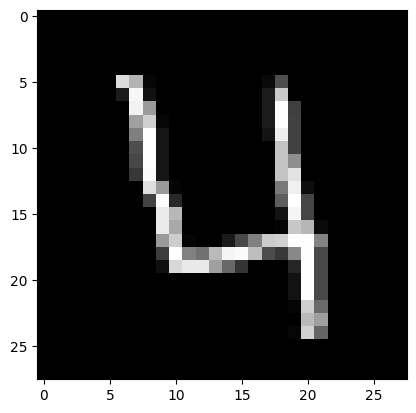

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 3
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')

Break the data into Images and Labels

In [ ]:
x = train.iloc[:,1:]
y = train['label']

In [ ]:
print(x.shape)
print(y.shape)

(42000, 784)
(42000,)


Train Test Split of Images

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(33600, 784)
(8400, 784)
(33600,)
(8400,)


Implement a Single Layer Perceptron

In [ ]:
per = Perceptron(verbose = 2)
per.fit(x_train, y_train)
per_preds_train = per.predict(x_train)
per_preds_test = per.predict(x_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.31 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


Norm: 36264.55, NNZs: 571, Bias: -73.000000, T: 100800, Avg. loss: 21133.352976
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 38909.07, NNZs: 576, Bias: -84.000000, T: 134400, Avg. loss: 20576.478393
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 41697.16, NNZs: 578, Bias: -98.000000, T: 168000, Avg. loss: 19900.769613
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 44398.44, NNZs: 581, Bias: -105.000000, T: 201600, Avg. loss: 20754.749137
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 46842.38, NNZs: 583, Bias: -118.000000, T: 235200, Avg. loss: 19517.157589
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 49225.67, NNZs: 594, Bias: -128.000000, T: 268800, Avg. loss: 19386.208720
Total training time: 0.42 seconds.
-- Epoch 9
Norm: 51823.38, NNZs: 599, Bias: -137.000000, T: 302400, Avg. loss: 18184.694405
Total training time: 0.48 seconds.
-- Epoch 10
Norm: 54147.67, NNZs: 600, Bias: -143.000000, T: 336000, Avg. loss: 17881.692321
Total training time: 0.53 second

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.6s finished


In [ ]:
print(per.n_iter_)

27


In [ ]:
weights = per.coef_

In [ ]:
per.intercept_

array([-1061.,  -213., -1456., -1105.,  -876.,   861., -1550.,  -148.,
       -3996., -1616.])

In [ ]:
per.loss_function_

In [ ]:
def model_eval(actual, predicted):
  conf_matrix = confusion_matrix(actual,predicted)
  clas_rep = classification_report(actual, predicted)
  acc_score = accuracy_score(actual, predicted)
  print("The model accuracy is: ", acc_score)
  print(conf_matrix)
  print(clas_rep)

In [ ]:
model_eval(y_train,per_preds_train )

The model accuracy is:  0.8858333333333334
[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93    

In [ ]:
model_eval(y_test, per_preds_test)

The model accuracy is:  0.8663095238095239
[[741   1   4   0   0  10  22   0   7   0]
 [  0 895   8   6   1   3   2   0  34   0]
 [  4   3 710  28   2   9  18   4  59   1]
 [  6   2  23 742   2  38   4   5  28   8]
 [  5   6  33   2 689   2  12   6  28  13]
 [ 12   5   4  38   3 654  21   1  58   4]
 [  3   1  12   0   0  18 823   1  12   0]
 [  4   5  32   1   2   6   0 781  15  14]
 [  6  11  15   8   2  25  10   5 732   3]
 [  5   2  37  14  62  30   0  85  82 510]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       785
           1       0.96      0.94      0.95       949
           2       0.81      0.85      0.83       838
           3       0.88      0.86      0.87       858
           4       0.90      0.87      0.88       796
           5       0.82      0.82      0.82       800
           6       0.90      0.95      0.92       870
           7       0.88      0.91      0.89       860
           8       0.69      0.90      

Multi Layer Perceptron

In [ ]:
#import cv2

In [ ]:
#img = cv2.imread('/content/download (1).png')

In [ ]:
#img.shape

In [ ]:
#type(img)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (8,8,8), max_iter = 250, verbose = True)

In [ ]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 2.47781593
Iteration 2, loss = 2.09713023
Iteration 3, loss = 2.01119698
Iteration 4, loss = 1.92385931
Iteration 5, loss = 1.85755416
Iteration 6, loss = 1.79600733
Iteration 7, loss = 1.74811088
Iteration 8, loss = 1.70941196
Iteration 9, loss = 1.53486939
Iteration 10, loss = 1.34871688
Iteration 11, loss = 1.23477733
Iteration 12, loss = 1.14085362
Iteration 13, loss = 1.05994152
Iteration 14, loss = 0.99649990
Iteration 15, loss = 0.95301947
Iteration 16, loss = 0.91091880
Iteration 17, loss = 0.83984623
Iteration 18, loss = 0.79017925
Iteration 19, loss = 0.76103488
Iteration 20, loss = 0.73322271
Iteration 21, loss = 0.70996635
Iteration 22, loss = 0.68950217
Iteration 23, loss = 0.66569379
Iteration 24, loss = 0.64867953
Iteration 25, loss = 0.62977093
Iteration 26, loss = 0.61071272
Iteration 27, loss = 0.59723588
Iteration 28, loss = 0.58716878
Iteration 29, loss = 0.57450336
Iteration 30, loss = 0.55936122
Iteration 31, loss = 0.54897188
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=250, verbose=True)

In [ ]:
preds_mlp_train = mlp.predict(x_train)
preds_mlp_test = mlp.predict(x_test)

In [ ]:
model_eval(y_train, preds_mlp_train)

The model accuracy is:  0.9245833333333333
[[3286    0    4    2    8    7   22    8   10    0]
 [   0 3678   12    7   10    0    1    4   20    3]
 [  33   28 3049   51   34   10   56   38   30   10]
 [   5    1   59 3036    8  156   24   42  137   25]
 [  59   17    4    9 3049    7   21    7    8   95]
 [  17    0    0  216   24 2496   64    7  147   24]
 [  70    4    3    7   21   31 3083    2   46    0]
 [   9    6   20   19   13    1    0 3375    6   92]
 [   4   47    8   33   24   87   35    5 2964   39]
 [  14    1    0    9  139   22    0   82   44 3050]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3347
           1       0.97      0.98      0.98      3735
           2       0.97      0.91      0.94      3339
           3       0.90      0.87      0.88      3493
           4       0.92      0.93      0.92      3276
           5       0.89      0.83      0.86      2995
           6       0.93      0.94      0.94    

In [ ]:
model_eval(y_test, preds_mlp_test)

The model accuracy is:  0.8814285714285715
[[745   0   3   4   6   7  15   4   1   0]
 [  2 917   7   2   6   1   2   0  10   2]
 [ 10  14 728  15  16   5  18  16  14   2]
 [  5   2  24 697   4  54   7  21  32  12]
 [ 14   7   2   3 709   1   5   3   6  46]
 [ 10   3   4  69  10 623  20   2  50   9]
 [ 41   6   6  12   6  21 767   1  10   0]
 [  5   5   6   7  10   0   0 793   5  29]
 [  4  17   4   9  23  23   7   2 719   9]
 [  6   0   1   1  55   7   0  36  15 706]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92       785
           1       0.94      0.97      0.96       949
           2       0.93      0.87      0.90       838
           3       0.85      0.81      0.83       858
           4       0.84      0.89      0.86       796
           5       0.84      0.78      0.81       800
           6       0.91      0.88      0.90       870
           7       0.90      0.92      0.91       860
           8       0.83      0.88      

In [ ]:
mlp.coefs_

[array([[-2.35521654e-315, -1.34550923e-317,  4.71186099e-315, ...,
          5.24106033e-316,  3.24002083e-315,  2.65808987e-315],
        [ 1.85803262e-315, -1.43158412e-315, -4.41316728e-315, ...,
          1.18461132e-317,  1.92422635e-315, -1.69828022e-315],
        [ 4.15614753e-315,  3.56161944e-317,  2.21289289e-315, ...,
          1.98520112e-316, -1.37134952e-315,  2.70208378e-315],
        ...,
        [-1.98990589e-315,  8.95649836e-316, -2.79180818e-315, ...,
          4.67480063e-315, -6.58636269e-316,  2.79408184e-316],
        [-4.69469220e-315, -4.00614196e-315, -7.35194656e-316, ...,
          6.05361082e-316,  9.38998514e-316, -1.42513732e-315],
        [ 8.14168643e-316,  3.19944768e-315,  1.32331898e-315, ...,
          5.70385270e-316, -1.20574543e-315, -5.96844264e-316]]),
 array([[ 9.48484659e-002,  2.15459289e-001, -1.61723513e-002,
          6.04167944e-001, -7.82456971e-003,  2.21949961e-002,
         -4.56158245e-002,  2.40644824e-001],
        [ 9.61864514e

In [ ]:
mlp.intercepts_

[array([-0.50910788,  0.6432162 , -2.87459936,  1.71235715,  1.73653195,
        -2.47248016,  2.69671751, -0.14371464]),
 array([ 1.54682057,  4.1334159 ,  3.11003935, -0.17812599,  1.87297483,
         5.03963663, -1.70340328,  2.31438113]),
 array([ 0.76450244, -2.06757931,  0.21659908, -0.25173116, -0.46125843,
        -1.13520791, -0.00228714, -0.12159144]),
 array([ 6.42294761, -1.9436568 ,  0.35696668, -1.0054644 ,  1.18114201,
        -1.29223734,  0.06723858,  0.34664273, -1.40729866, -0.71933466])]

# Keras Implementation

Approach to creating models in Keras

1.   Initializing a model
     1. Sequential Model (Sequence of Layers)
     2. Functional Model (Multi modal, Transfer Learning)
2.   Set up the layers
     1. Dense Layers, Fully Connected Layers, MLP
     2. Dropout (Avoids overfitting)
3.   Compilation
     1. Optimizer (SGD, ADAM)
     2. Loss Function (Regression Loss Functions, Classification Loss Func)
     3. Metrics (Accuracy)
4.   Model Fit
     1. X & Y (Train and Test)
     2. Epochs (Number of iterations)
     3. Batch_Size = 128, 256 - Batch of images



In [ ]:
model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (784,)))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

In [ ]:
model.compile(optimizer = 'Adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(33600, 10)
(8400, 10)


In [ ]:
y_train

40572    2
20883    9
3479     2
34084    1
2067     5
        ..
7763     0
15377    7
17730    9
28030    6
15725    7
Name: label, Length: 33600, dtype: int64

In [ ]:
y_train_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
y_test_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
hist = model.fit(x_train, y_train_ohe, validation_data=(x_test, y_test_ohe), epochs = 250, batch_size = 64, verbose=2)

Epoch 1/250
525/525 - 5s - loss: 4.8479 - accuracy: 0.2438 - val_loss: 1.5382 - val_accuracy: 0.4663 - 5s/epoch - 9ms/step
Epoch 2/250
525/525 - 3s - loss: 1.6575 - accuracy: 0.4156 - val_loss: 1.2095 - val_accuracy: 0.5624 - 3s/epoch - 6ms/step
Epoch 3/250
525/525 - 3s - loss: 1.4469 - accuracy: 0.4762 - val_loss: 0.9715 - val_accuracy: 0.6567 - 3s/epoch - 6ms/step
Epoch 4/250
525/525 - 4s - loss: 1.2588 - accuracy: 0.5627 - val_loss: 0.8158 - val_accuracy: 0.7439 - 4s/epoch - 8ms/step
Epoch 5/250
525/525 - 3s - loss: 1.0659 - accuracy: 0.6506 - val_loss: 0.6674 - val_accuracy: 0.7917 - 3s/epoch - 5ms/step
Epoch 6/250
525/525 - 3s - loss: 0.8869 - accuracy: 0.7018 - val_loss: 0.5781 - val_accuracy: 0.8020 - 3s/epoch - 5ms/step
Epoch 7/250
525/525 - 3s - loss: 0.8204 - accuracy: 0.7251 - val_loss: 0.5434 - val_accuracy: 0.8104 - 3s/epoch - 5ms/step
Epoch 8/250
525/525 - 4s - loss: 0.7682 - accuracy: 0.7377 - val_loss: 0.5210 - val_accuracy: 0.8199 - 4s/epoch - 8ms/step
Epoch 9/250
525/

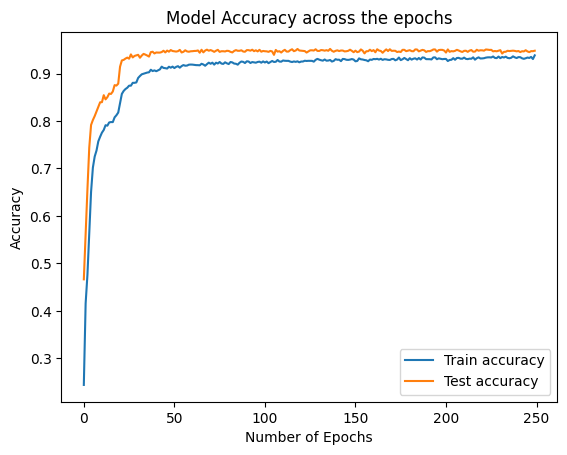

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy across the epochs')
plt.legend(["Train accuracy", "Test accuracy"])
plt.show()

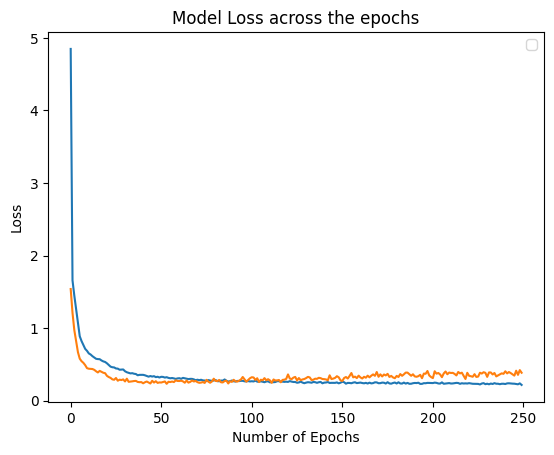

In [ ]:
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss across the epochs')
plt.legend(["Train Loss", "Test Loss"])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])